In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
data = pd.read_csv('dietttt.csv')


In [8]:
print(data.head())

   Age Gender  Weight (kg)  Height (cm) Activity Level Dietary Preferences  \
0   14  Other           16           71         Medium         Gluten-Free   
1   49  Other           69          199           High               Vegan   
2   98   Male           19          140           High      Non-Vegetarian   
3   91  Other           48          138         Medium      Non-Vegetarian   
4   92   Male           88           82         Medium      Non-Vegetarian   

  Medical Conditions  
0       Hypertension  
1   High Cholesterol  
2            Obesity  
3           Diabetes  
4       Hypertension  


In [10]:
# Handle missing values using SimpleImputer for numerical columns
imputer = SimpleImputer(strategy='mean')  # Use 'mean' for numerical columns
data[['Age', 'Weight (kg)', 'Height (cm)']] = imputer.fit_transform(data[['Age', 'Weight (kg)', 'Height (cm)']])

In [12]:
print(data.columns)


Index(['Age', 'Gender', 'Weight (kg)', 'Height (cm)', 'Activity Level',
       'Dietary Preferences', 'Medical Conditions'],
      dtype='object')


In [14]:
# Handle missing values in categorical columns using most_frequent strategy
imputer_cat = SimpleImputer(strategy='most_frequent')  # Use 'most_frequent' for categorical columns
data[['Medical Conditions']] = imputer_cat.fit_transform(data[['Medical Conditions']])

In [16]:
# Convert categorical data to numeric for clustering
data['Gender'] = data['Gender'].astype('category').cat.codes
data['Activity Level'] = data['Activity Level'].astype('category').cat.codes
data['Dietary Preferences'] = data['Dietary Preferences'].astype('category').cat.codes
data['Medical Conditions'] = data['Medical Conditions'].astype('category').cat.codes

In [18]:
# Define features for clustering
X = data[['Age', 'Weight (kg)', 'Height (cm)', 'Activity Level', 'Dietary Preferences', 'Medical Conditions']]

In [20]:
kmeans = KMeans(n_clusters=3, random_state=0)  # You can adjust the number of clusters
data['Cluster'] = kmeans.fit_predict(X)

E:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "E:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "E:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "E:\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^

In [22]:
# Example function to generate diet plans
def generate_diet_plan(cluster):
    if cluster == 0:
        return {
            "Breakfast": "Scrambled eggs with spinach, whole grain bread, almond milk smoothie",
            "Lunch": "Grilled chicken salad with steamed broccoli, coconut water",
            "Dinner": "Baked salmon with roasted sweet potatoes, steamed greens"
        }
    elif cluster == 1:
        return {
            "Breakfast": "Oatmeal with almond butter and chopped nuts, fresh fruit",
            "Lunch": "Quinoa salad with chickpeas, avocado, sautéed greens",
            "Dinner": "Lentil stew with brown rice, steamed greens"
        }
    else:
        return {
            "Breakfast": "Gluten-free pancake with almond butter and nuts, green tea",
            "Lunch": "Vegetable soup with a side of brown rice, fresh fruit",
            "Dinner": "Grilled tofu with roasted sweet potatoes and kale"
        }

In [24]:
# Apply the function to all clusters
data['Diet Plan'] = data['Cluster'].apply(generate_diet_plan)

In [26]:
# Display the dataset with generated diet plans
print(data[['Age', 'Gender', 'Weight (kg)', 'Height (cm)', 'Activity Level', 'Dietary Preferences', 'Medical Conditions', 'Cluster', 'Diet Plan']])

      Age  Gender  Weight (kg)  Height (cm)  Activity Level  \
0    14.0       2         16.0         71.0               2   
1    49.0       2         69.0        199.0               0   
2    98.0       1         19.0        140.0               0   
3    91.0       2         48.0        138.0               2   
4    92.0       1         88.0         82.0               2   
..    ...     ...          ...          ...             ...   
195   9.0       1         85.0         69.0               0   
196  38.0       1         73.0        132.0               1   
197  90.0       2        113.0        200.0               0   
198  91.0       2        146.0        115.0               2   
199  42.0       0         89.0         55.0               1   

     Dietary Preferences  Medical Conditions  Cluster  \
0                      0                   2        1   
1                      3                   1        0   
2                      2                   3        0   
3              

In [28]:
# Plotting the clusters
# Reduce the features to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

<Axes: >

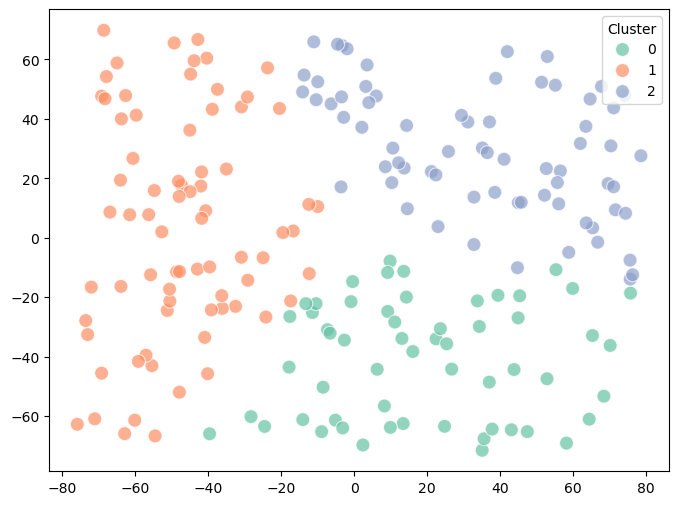

In [30]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=data['Cluster'], palette='Set2', s=100, alpha=0.7)


C:\Users\91969\AppData\Local\Temp\ipykernel_3988\3798758978.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster', loc='best')


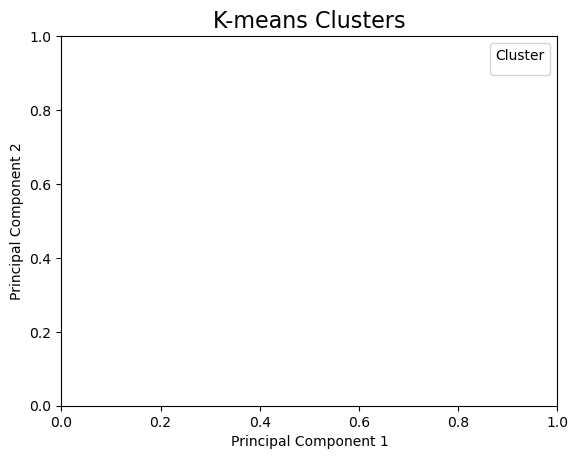

In [32]:
# Add labels and title
plt.title('K-means Clusters', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')


In [34]:
plt.show()

In [36]:
X = data[['Age', 'Weight (kg)', 'Height (cm)', 'Activity Level', 'Dietary Preferences', 'Medical Conditions']]


In [38]:
# Elbow Method to find the optimal number of clusters
inertia = []  # List to store inertia values for different k values


In [40]:
# Calculate inertia for a range of k values (from 1 to 10 clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

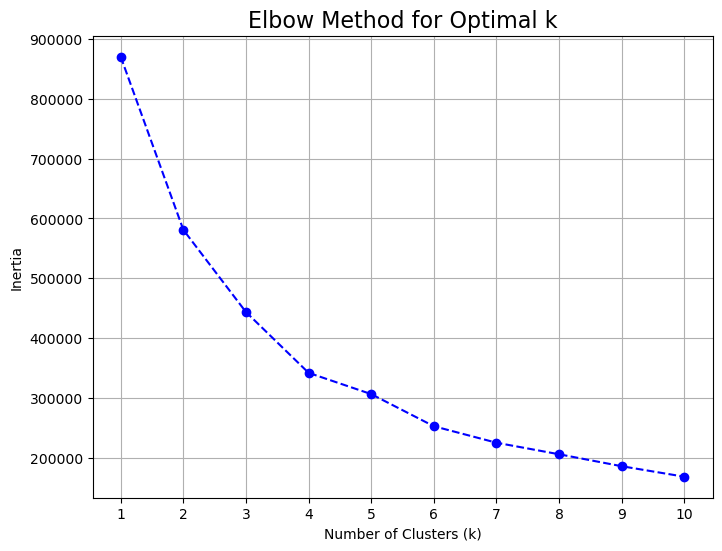

In [42]:
# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()